In [1]:
# linear algebra
import numpy as np 
# data processing, CSV file I/O (e.g. pd.read_csv)
import pandas as pd 

In [2]:
# reading dataset
df=pd.read_csv("BTC_Data_final.csv")

In [3]:
df['Date'] = pd.to_datetime(df['Date'],format='%Y-%m-%d')
df.set_index("Date", inplace = True)

In [4]:
df.head()

,priceUSD,size,sentbyaddress,transactions,mining_profitability,sentinusd,transactionfees,median_transaction_fee,confirmationtime,marketcap,transactionvalue,mediantransactionvalue,tweets,google_trends,fee_to_reward,activeaddresses,top100cap
Date,,,,,,,,,,,,,,,,,
2014-04-09,447.110,243742.0,122401,64992,38.678,239212041.0,0.1390,0.0447,8.944,5587996110,4115.0,100.420,8193,11.193,0.502,179274,19.211
2014-04-10,407.703,254334.0,124298,67872,31.917,310367120.0,0.0864,0.0408,9.290,5020359905,4876.0,120.946,15039,13.854,0.371,182996,19.166
2014-04-11,403.328,223656.0,117926,65563,36.814,292756343.0,0.0858,0.0403,8.521,5068919648,4819.0,108.481,14907,12.997,0.330,169622,19.141
2014-04-12,425.310,169964.0,87828,47579,34.498,157264741.0,0.0811,0.0425,8.944,5329088351,3574.0,84.408,7582,9.229,0.226,132283,19.145
2014-04-13,415.876,162260.0,94828,50981,34.141,154756367.0,0.0840,0.0416,7.701,5150414718,3332.0,69.681,10674,10.385,0.221,172708,19.131


In [5]:
df.tail()

,priceUSD,size,sentbyaddress,transactions,mining_profitability,sentinusd,transactionfees,median_transaction_fee,confirmationtime,marketcap,transactionvalue,mediantransactionvalue,tweets,google_trends,fee_to_reward,activeaddresses,top100cap
Date,,,,,,,,,,,,,,,,,
2022-12-18,16736.0,511467.0,439567,212528,0.0650,3.493454e+09,0.912,0.377,9.931,321956223728,55620.0,400.564,81518,15.485,1.263,691511,14.731
2022-12-19,16679.0,706111.0,484919,258960,0.0569,6.191116e+09,1.164,0.450,10.588,320876529094,67503.0,447.028,100038,17.697,2.083,804421,14.672
2022-12-20,16788.0,665567.0,510455,268753,0.0630,6.787239e+09,1.128,0.470,10.286,322974092809,61942.0,449.510,90756,18.329,2.022,815486,14.681
2022-12-21,16830.0,653348.0,515872,272348,0.0620,6.851055e+09,1.021,0.418,10.070,323809163721,53386.0,434.257,88992,18.329,1.817,782726,14.673
2022-12-22,16779.0,676142.0,526770,271046,0.0596,5.924482e+09,1.061,0.442,10.667,322835455577,50808.0,453.449,88226,18.329,1.992,789264,14.687


In [6]:
df.shape

(3180, 17)

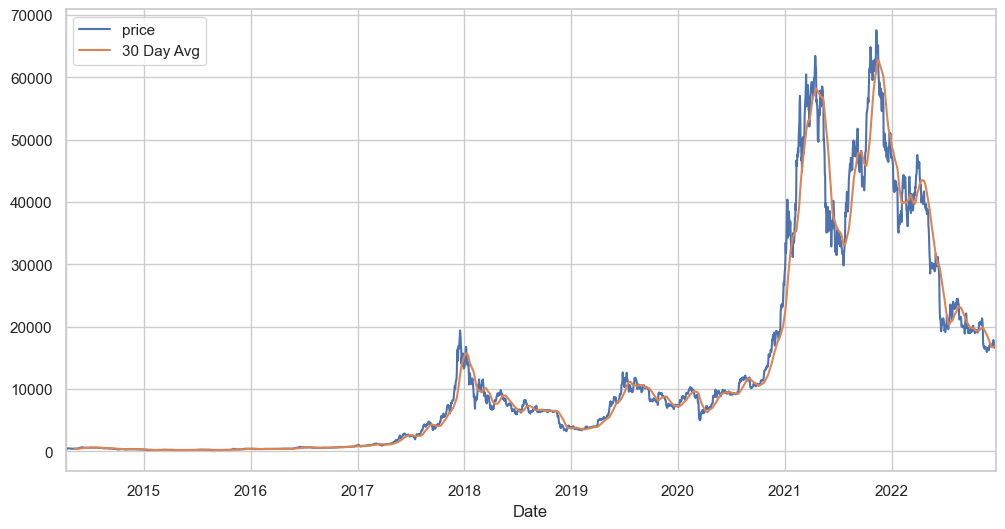

In [7]:
# Visulising the price of BTC 30 day average basis
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
sns.set_style('whitegrid')
df['priceUSD'].plot(figsize=(12,6),label='price')
df['priceUSD'].rolling(window=30).mean().plot(label='30 Day Avg')# Plotting the 
plt.legend()
plt.show()

In [8]:
df.isnull().sum()

priceUSD                  0
size                      0
sentbyaddress             0
transactions              0
mining_profitability      0
sentinusd                 0
transactionfees           0
median_transaction_fee    0
confirmationtime          0
marketcap                 0
transactionvalue          0
mediantransactionvalue    0
tweets                    0
google_trends             0
fee_to_reward             0
activeaddresses           0
top100cap                 0
dtype: int64

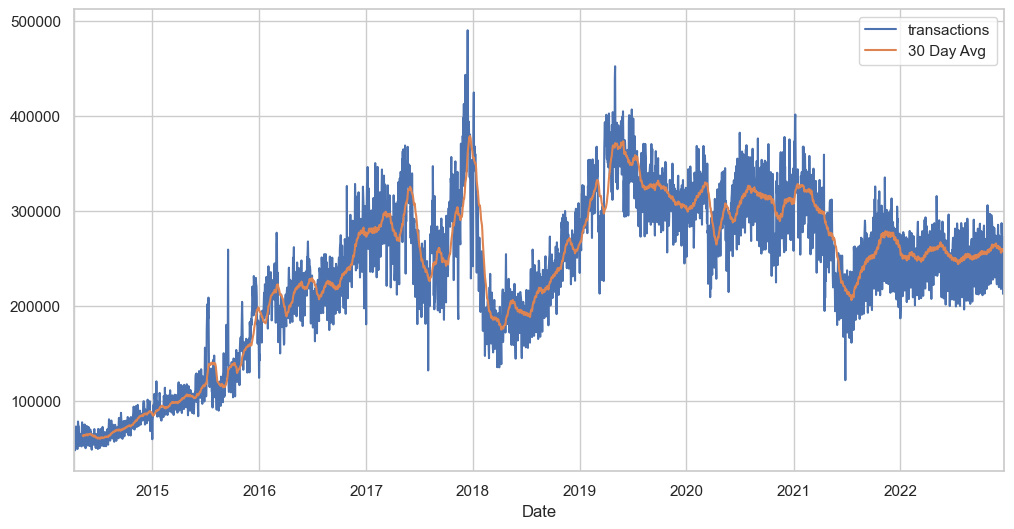

In [9]:
# ploting the no of tractions on 30 average basis
sns.set()
sns.set_style('whitegrid')
df['transactions'].plot(figsize=(12,6),label='transactions')
df['transactions'].rolling(window=30).mean().plot(label='30 Day Avg')# Plotting the 
plt.legend()
plt.show()

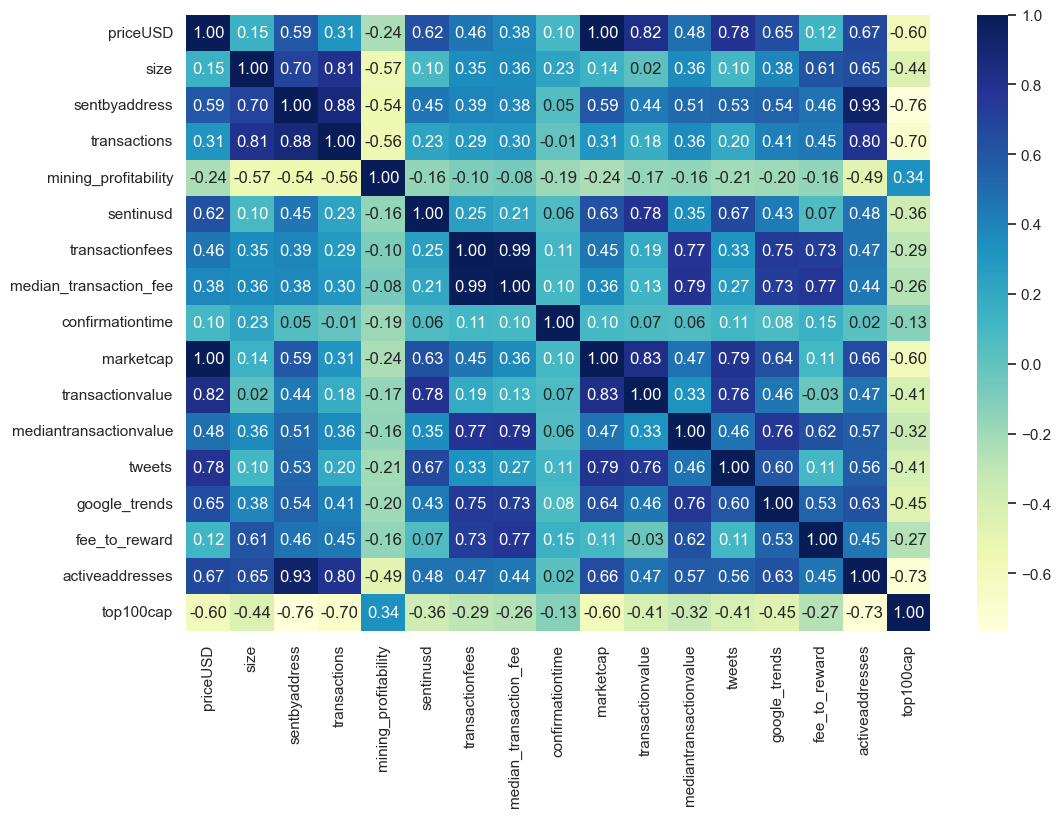

In [10]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot = True, cmap= 'YlGnBu', fmt= '.2f')
plt.show()

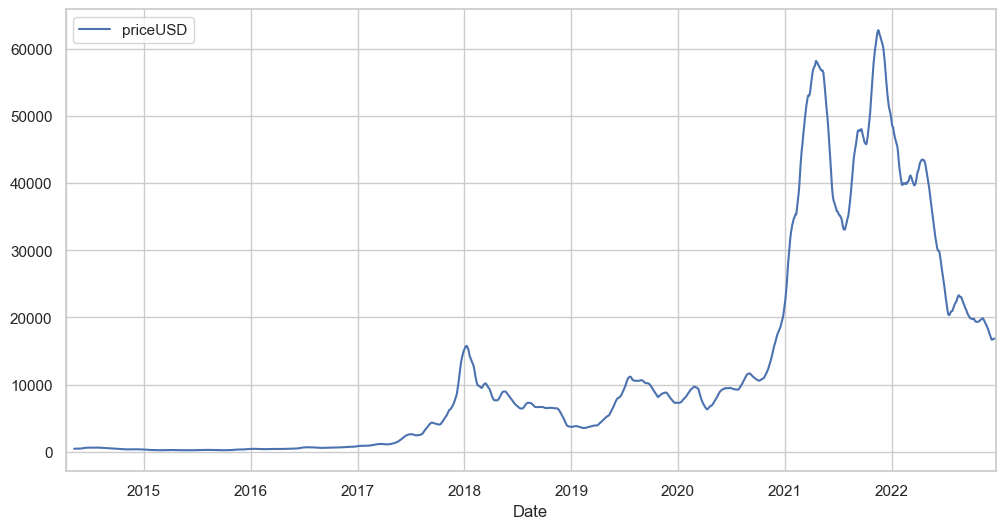

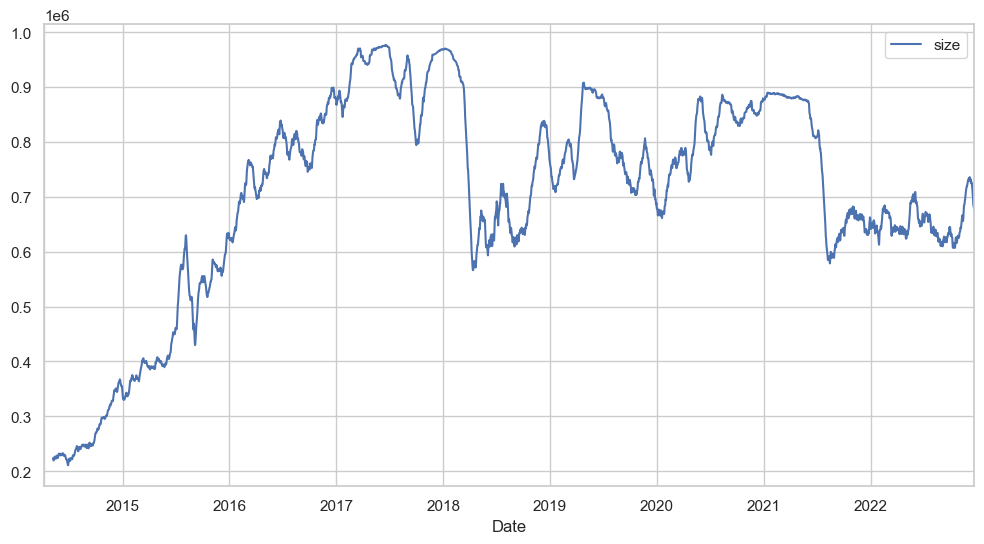

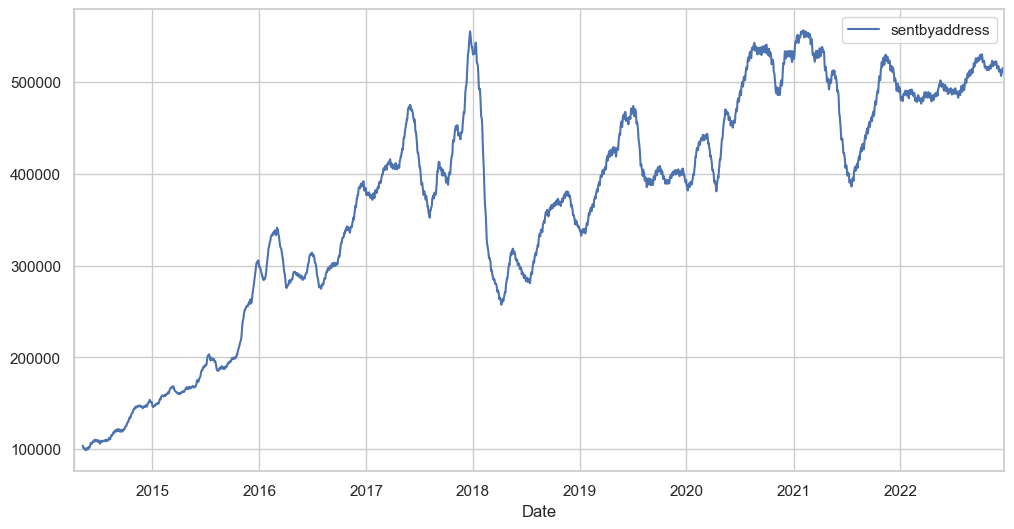

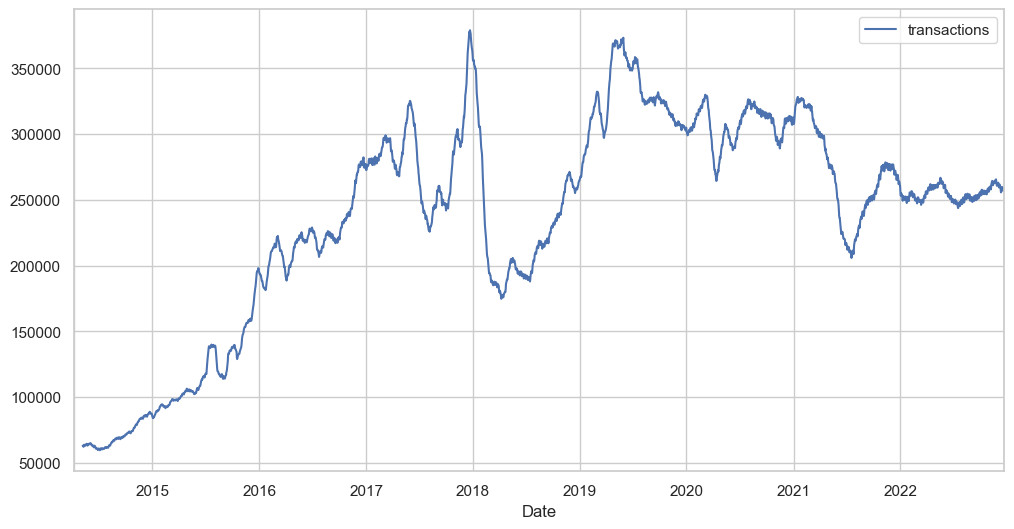

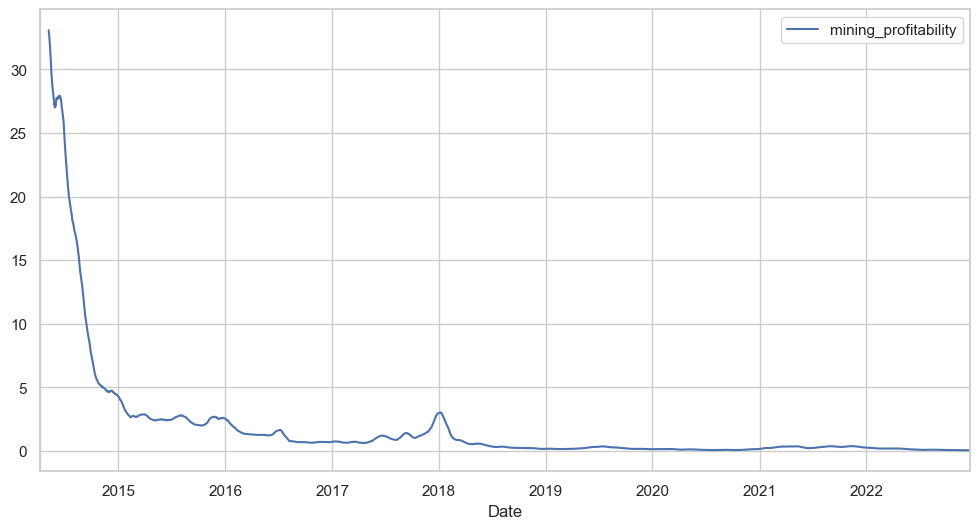

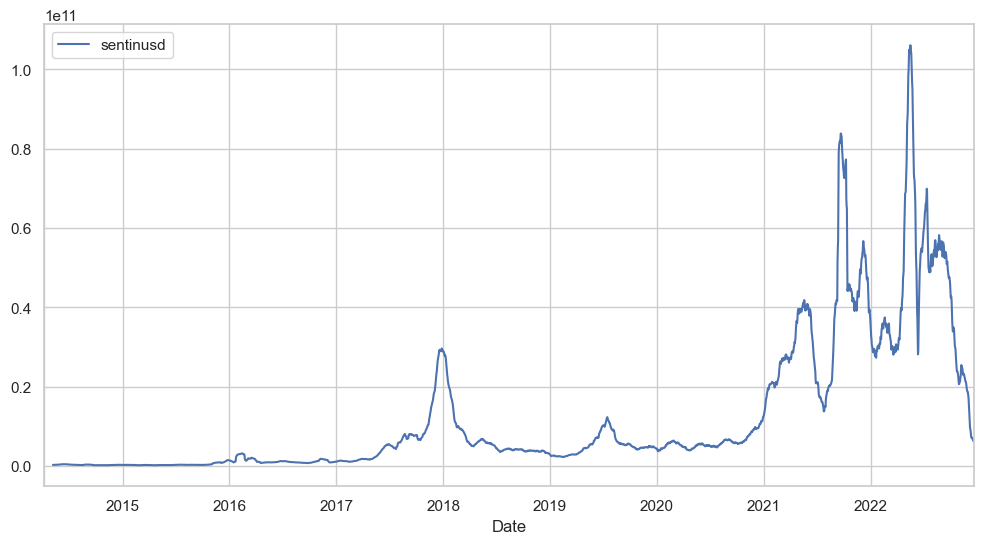

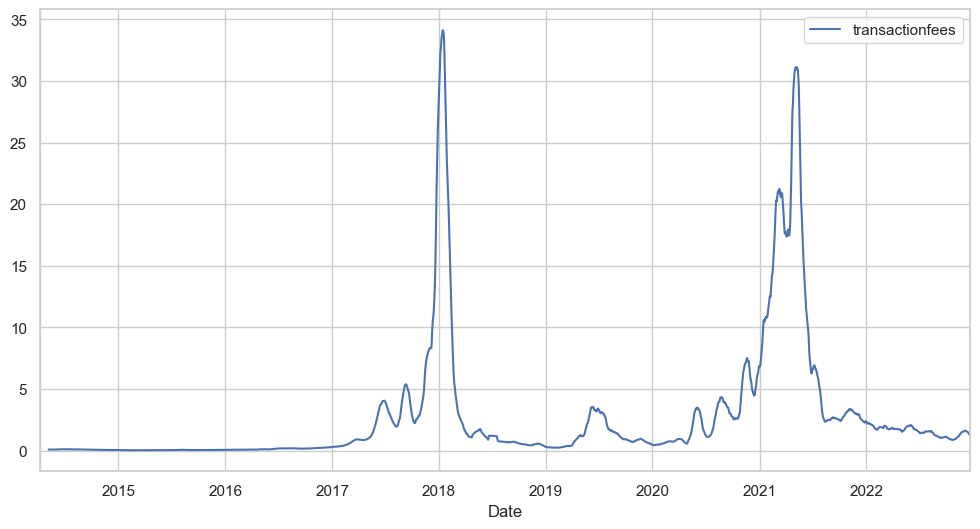

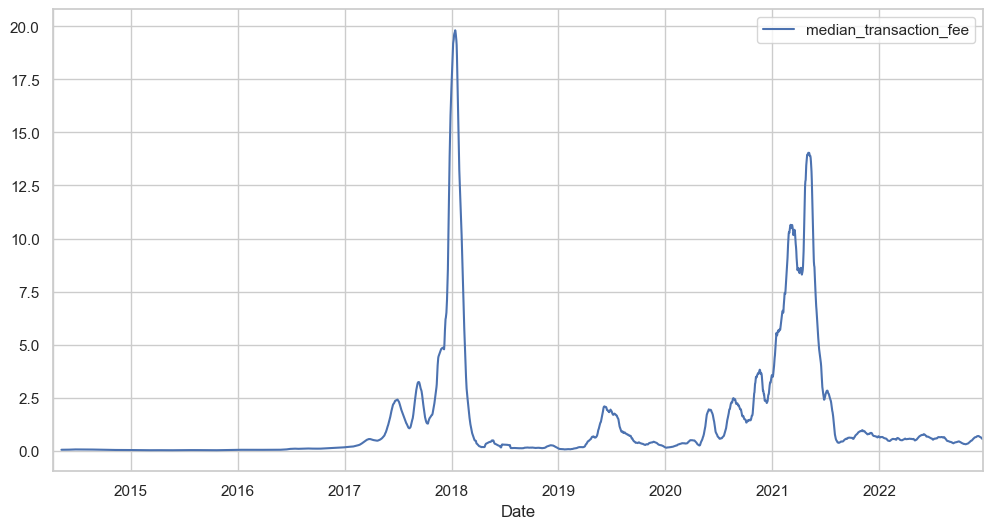

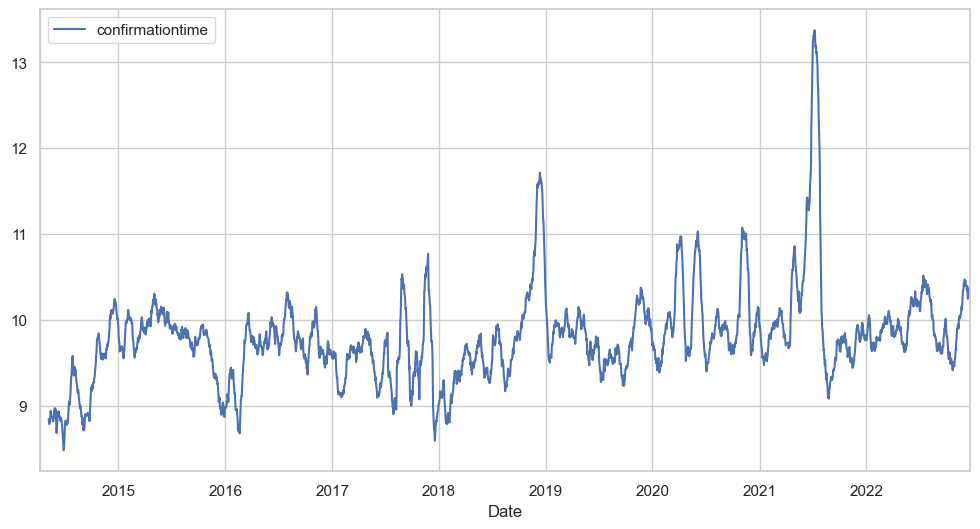

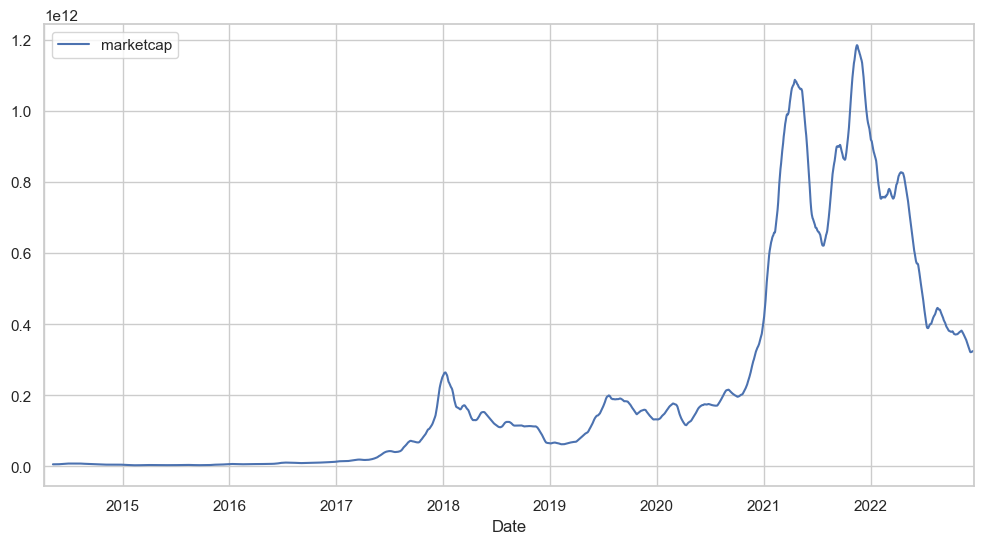

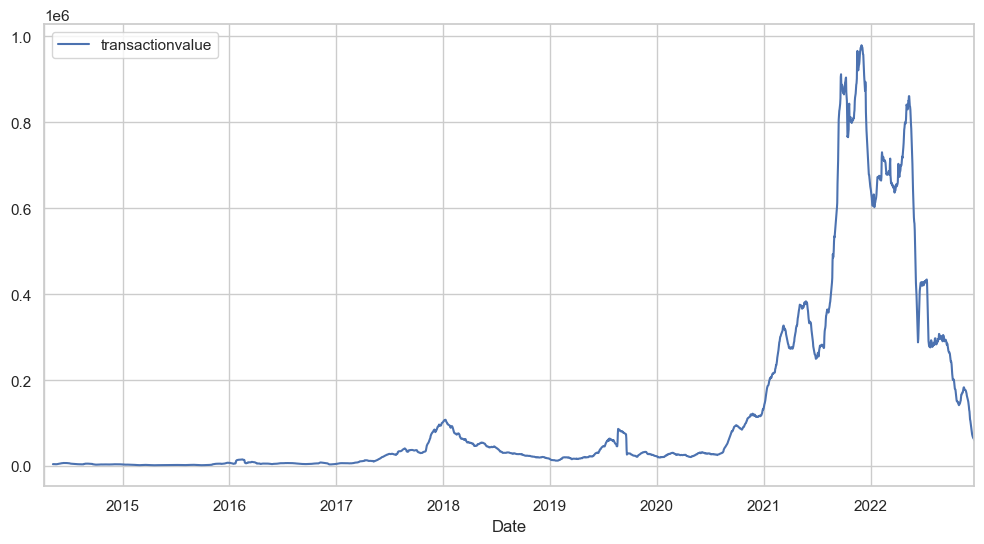

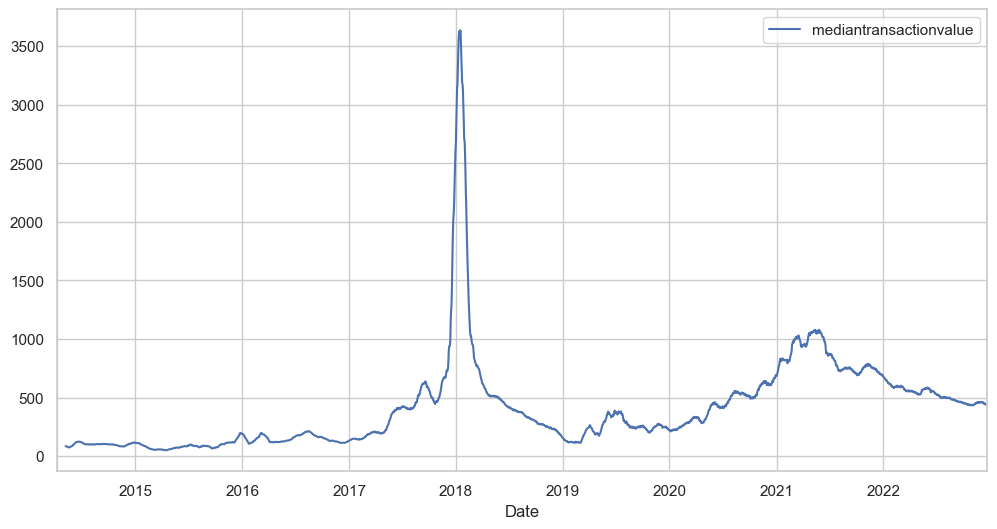

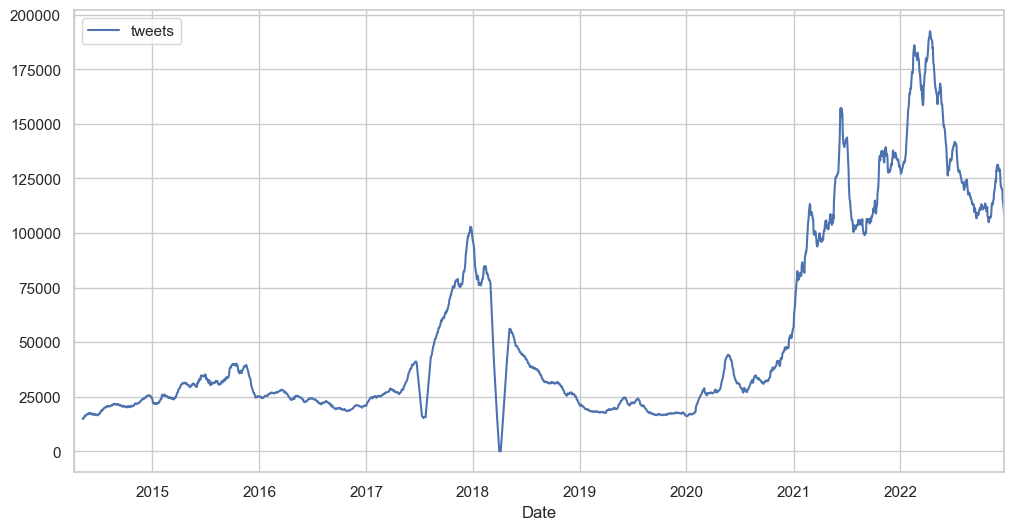

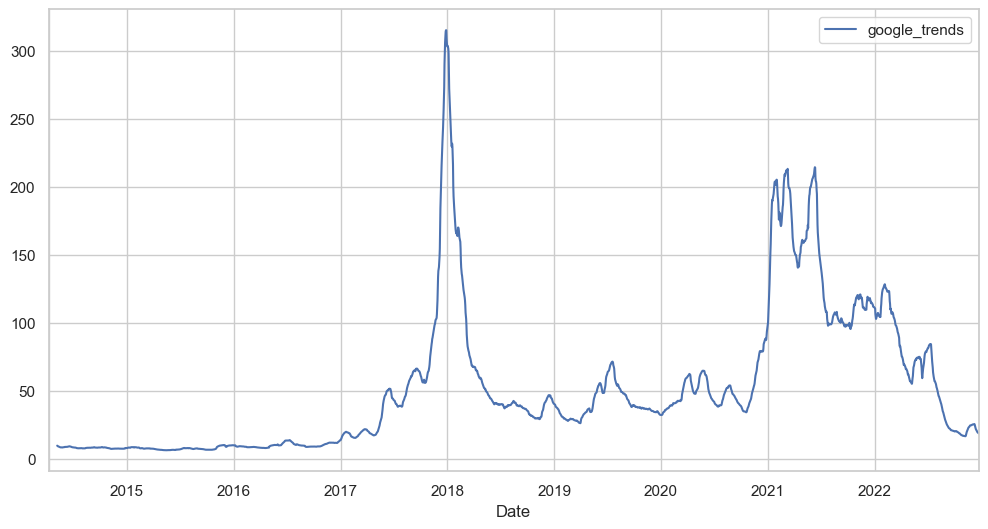

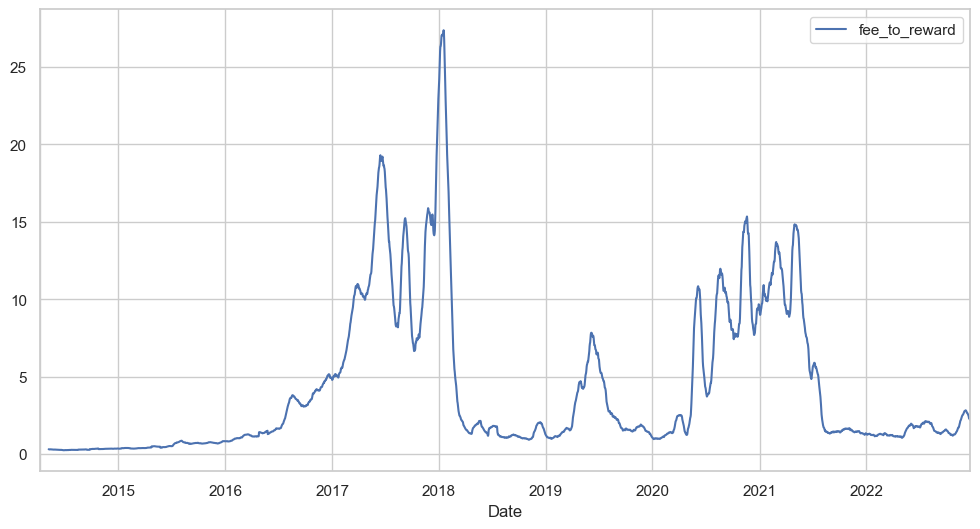

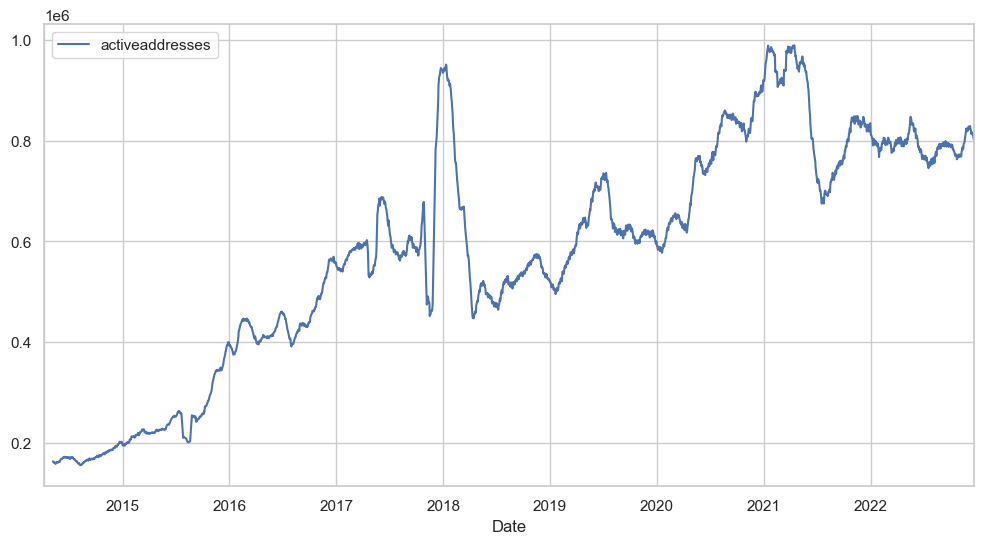

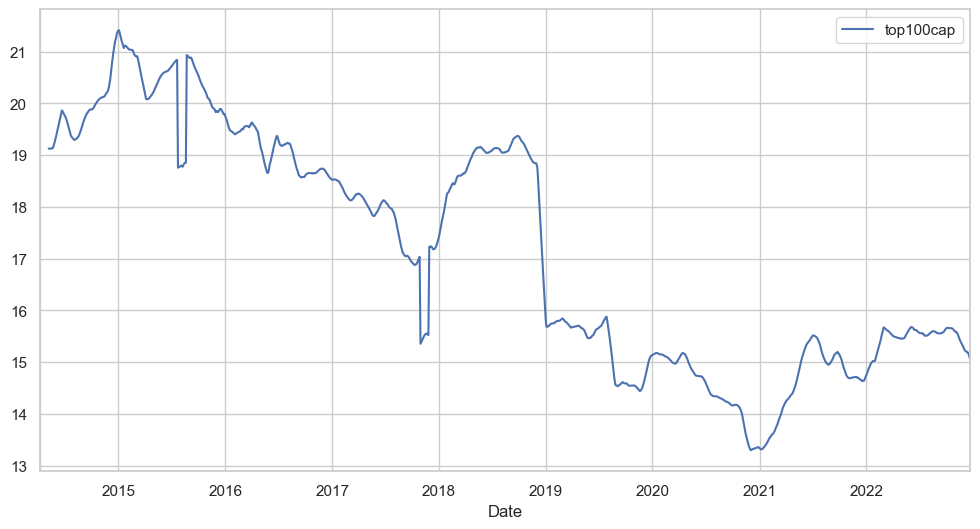

In [11]:
# Visulising the price of BTC 30 day average basis
features=list(df.columns)
for i in features:
    sns.set()
    sns.set_style('whitegrid')
    df[i].rolling(window=30).mean().plot(figsize=(12,6),label=i)
    plt.legend()
    plt.show()

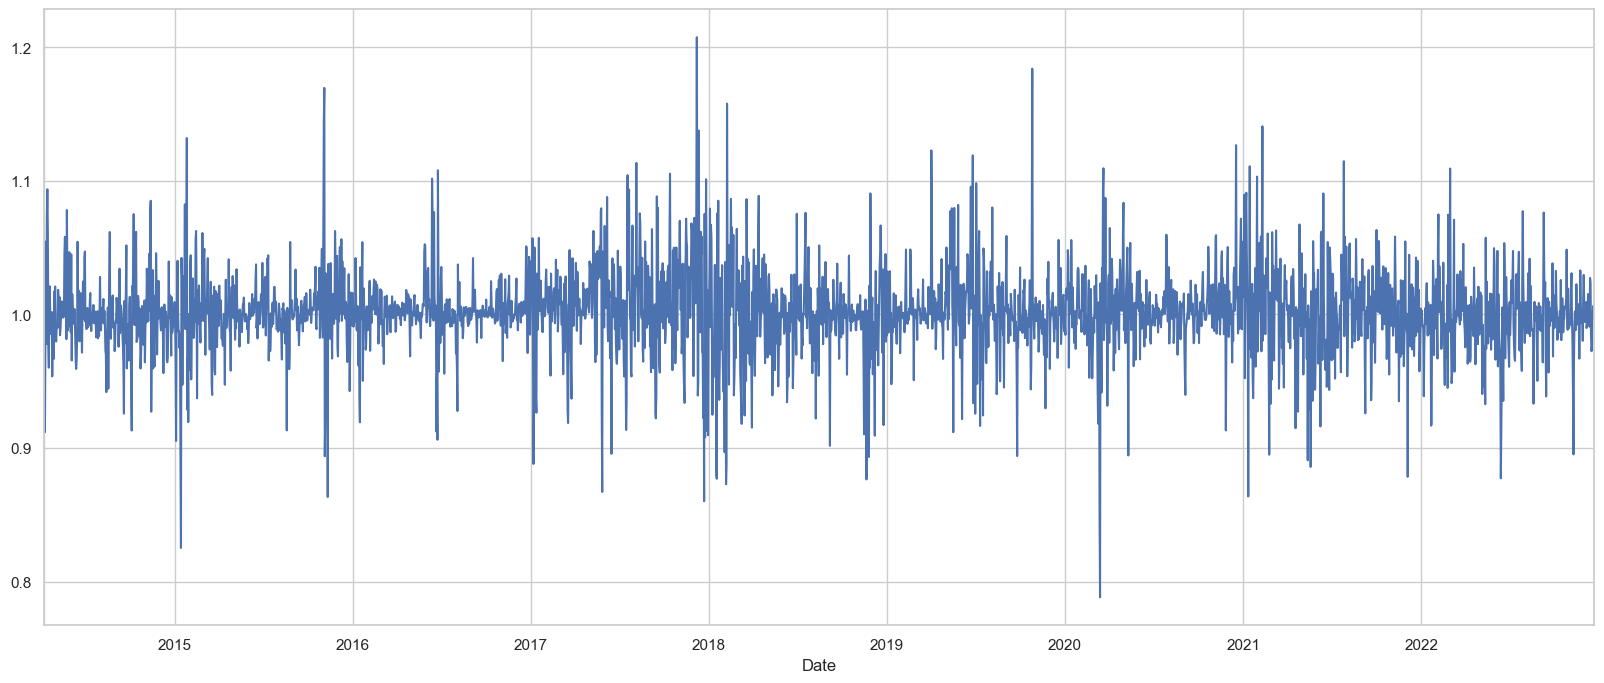

In [12]:
df = df.assign(Change=pd.Series(df.priceUSD.div(df.priceUSD.shift())))
df['Change'].plot(figsize=(20,8))
plt.show()

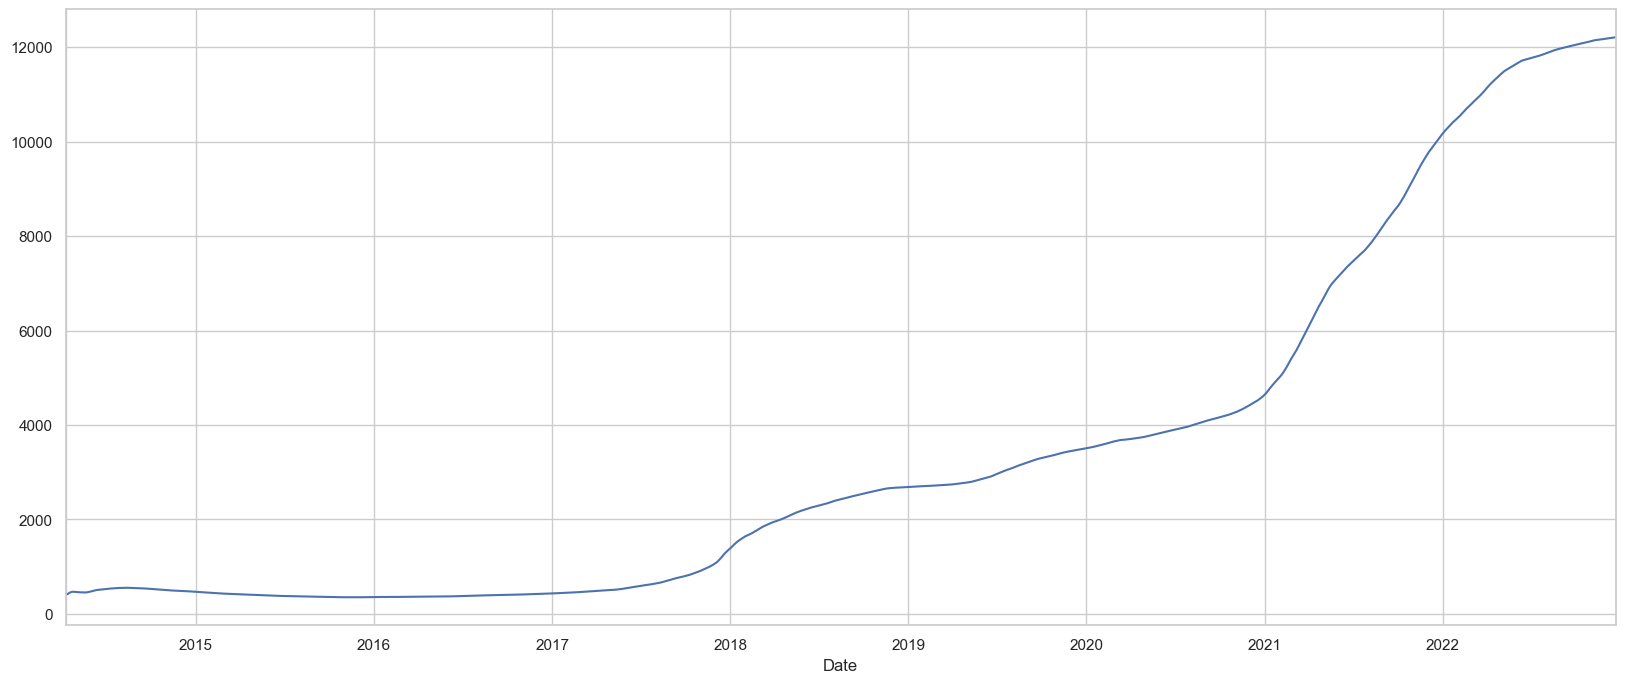

In [13]:
df = df.assign(expanding_mean=pd.Series(df['priceUSD'].expanding(1).mean()))
df['expanding_mean'].plot(figsize=(20,8))
plt.show()

In [14]:
df['lag_1'] = df['priceUSD'].shift(1)
df['lag_2'] = df['priceUSD'].shift(2)
df['lag_3'] = df['priceUSD'].shift(3)
df['lag_4'] = df['priceUSD'].shift(4)
df['lag_5'] = df['priceUSD'].shift(5)
df['lag_6'] = df['priceUSD'].shift(6)
df['lag_7'] = df['priceUSD'].shift(7)

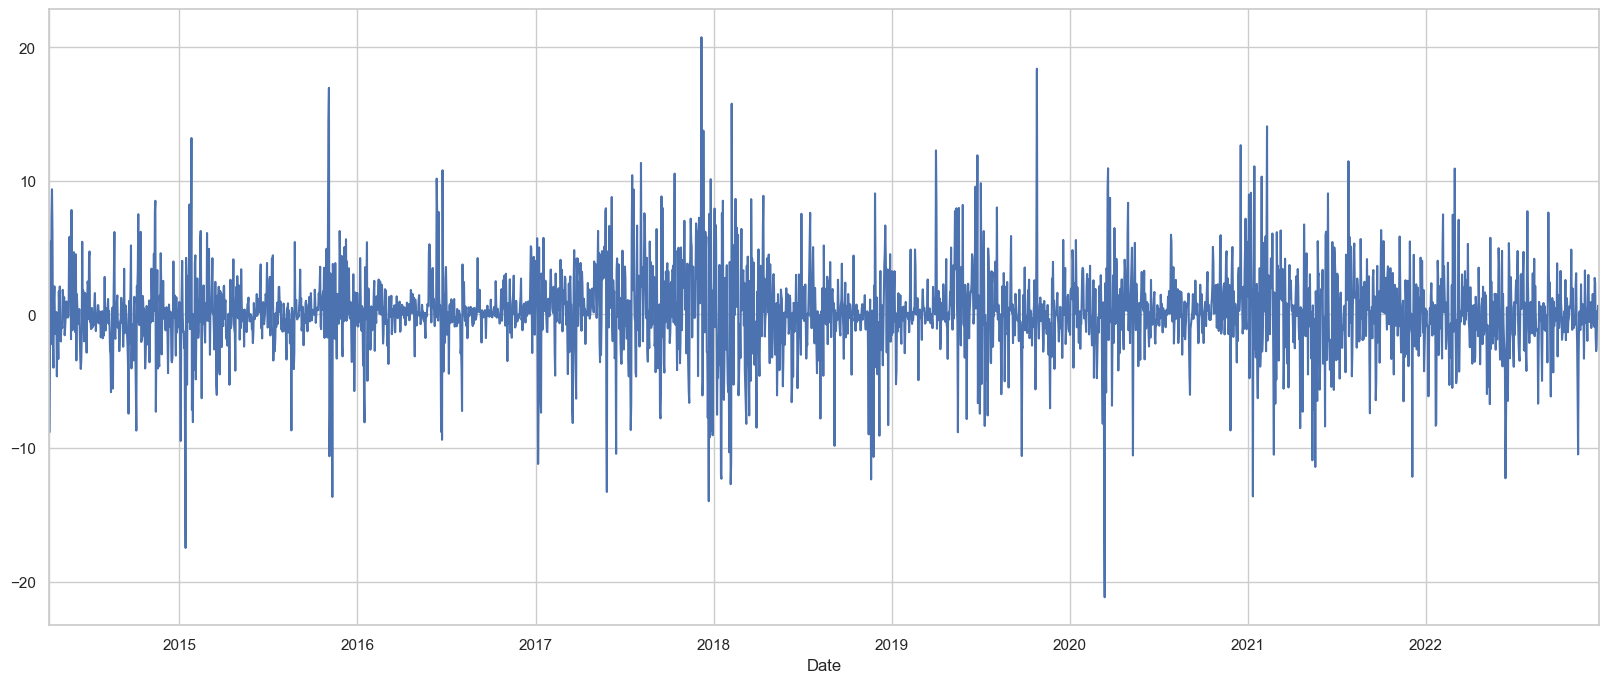

In [15]:
df = df.assign(Return=pd.Series(df.Change.sub(1).mul(100)))
df['Return'].plot(figsize=(20,8))
plt.show()

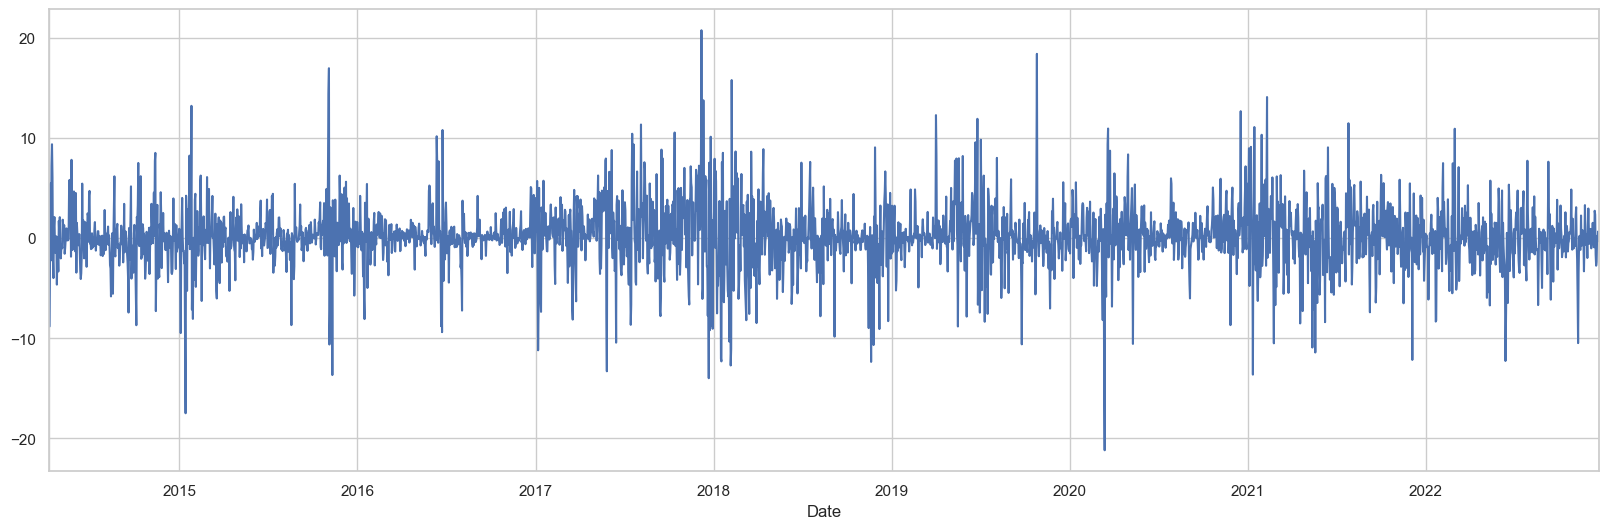

In [16]:
df.priceUSD.pct_change().mul(100).plot(figsize=(20,6))
plt.show()

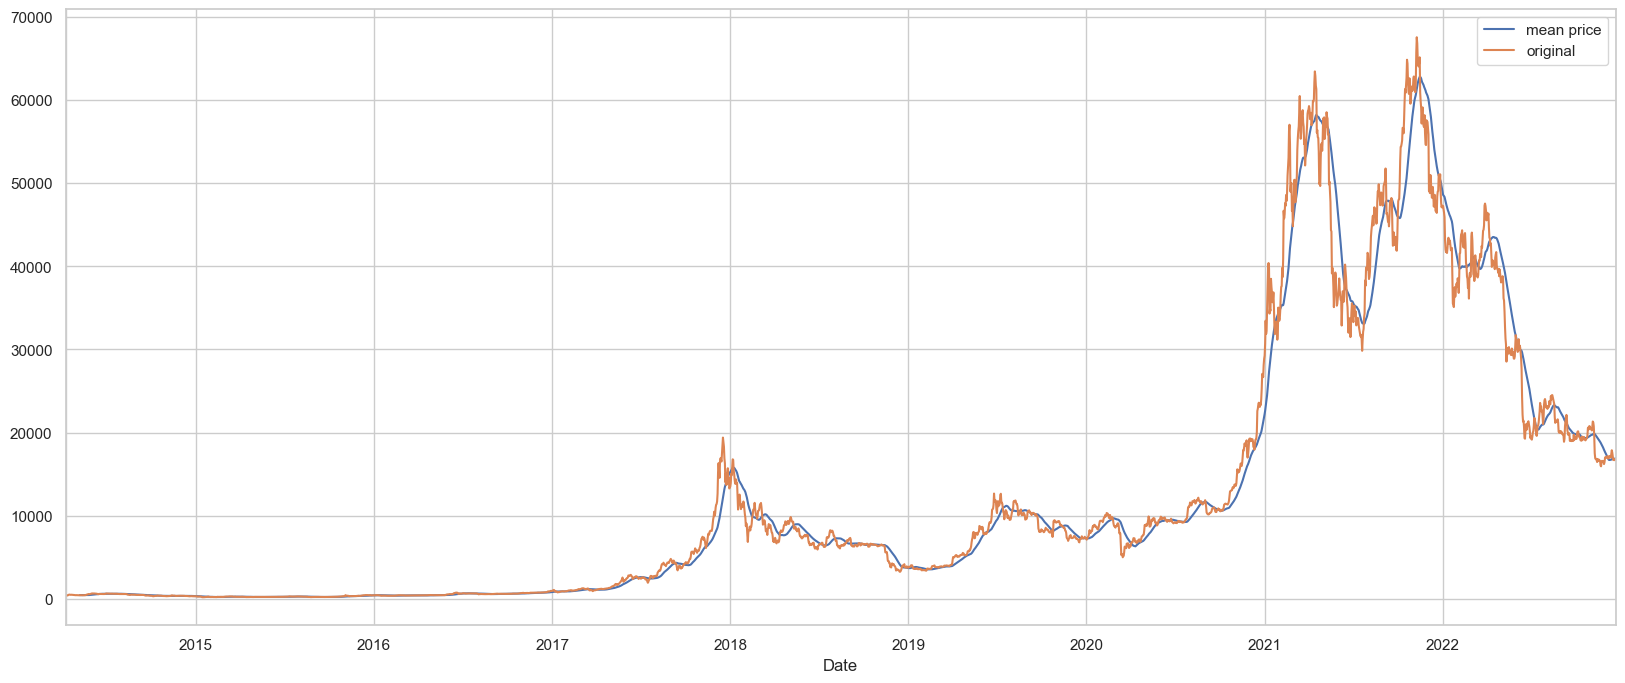

In [17]:
df = df.assign(Mean=pd.Series(df['priceUSD'].rolling(window=30).mean()))
df['Mean'].plot(figsize=(20,8),label='mean price')
df['priceUSD'].plot(label='original')
plt.legend()
plt.show()

In [18]:
# summary stats
print(df["priceUSD"].describe())

count     3180.000000
mean     12210.656699
std      16007.272397
min        197.577000
25%        603.998000
50%       6571.500000
75%      15238.500000
max      67547.000000
Name: priceUSD, dtype: float64


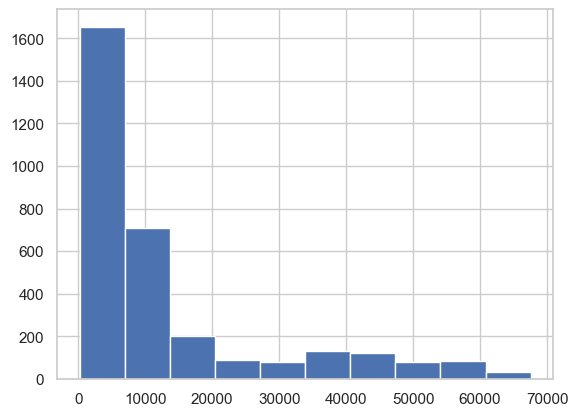

In [19]:
# histogram plot
df["priceUSD"].hist()
plt.show()

In [20]:
# prepare situation
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from matplotlib import pyplot
def moving_average_(data):
    X = data
    window = 3
    history = [X[i] for i in range(window)]
    test = [X[i] for i in range(window, len(X))]
    predictions = list()
    # walk forward over time steps in test
    for t in range(len(test)):
        length = len(history)
        yhat = np.mean([history[i] for i in range(length-window,length)])
        obs = test[t]
        predictions.append(yhat)
        history.append(obs)
        #print('predicted=%f, expected=%f' % (yhat, obs))
    error = mean_squared_error(test, predictions)
    print('Test MSE: %.3f' % error)
    # zoom plot
    pyplot.plot(test[0:100],label="Original")
    pyplot.plot(predictions[0:100], color='red',label="Prediction")
    plt.legend()
    pyplot.show()

Test MSE: 787730.525


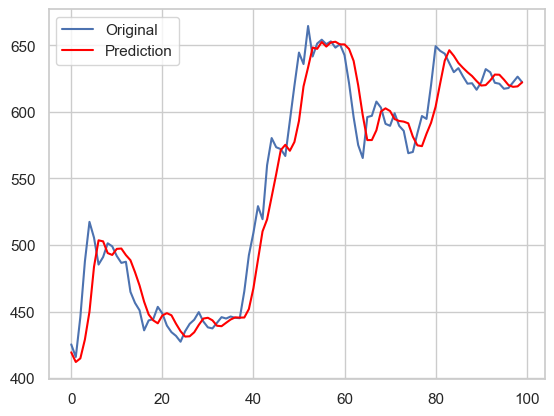

In [21]:
moving_average_(df["priceUSD"].values)

In [22]:
df_train = df[df.index < "2019"]
df_valid = df[df.index >= "2019"]

In [23]:
df.columns

Index(['priceUSD', 'size', 'sentbyaddress', 'transactions',
       'mining_profitability', 'sentinusd', 'transactionfees',
       'median_transaction_fee', 'confirmationtime', 'marketcap',
       'transactionvalue', 'mediantransactionvalue', 'tweets', 'google_trends',
       'fee_to_reward', 'activeaddresses', 'top100cap', 'Change',
       'expanding_mean', 'lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'lag_6',
       'lag_7', 'Return', 'Mean'],
      dtype='object')

In [24]:
important_feature_=['size', 'sentbyaddress', 'transactions',
       'mining_profitability', 'sentinusd', 'transactionfees',
       'median_transaction_fee', 'confirmationtime', 'marketcap',
       'transactionvalue', 'mediantransactionvalue', 'tweets', 'google_trends',
       'fee_to_reward', 'activeaddresses', 'top100cap', 'Change',
       'expanding_mean', 'lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'lag_6',
       'lag_7', 'Return', 'Mean']

In [25]:
! pip install pmdarima

In [26]:
from pmdarima import auto_arima
model = auto_arima(df_train.priceUSD,
                   trace=True, error_action="ignore", suppress_warnings=True)
model.fit(df_train.priceUSD)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=23378.194, Time=1.93 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=23457.535, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=23398.043, Time=0.22 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=23401.386, Time=0.27 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=23455.676, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=23376.621, Time=1.75 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=23398.539, Time=0.42 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=23400.035, Time=0.29 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=23378.316, Time=2.17 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=23397.650, Time=0.51 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=23381.814, Time=2.35 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=23379.674, Time=4.23 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=23374.693, Time=0.93 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=23396.629, Time=0.19 sec
 ARIMA(1,1,1)(0,0,0

ARIMA(order=(1, 1, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [27]:
forecast = model.predict(n_periods=len(df_valid))
forecast = pd.DataFrame(forecast).reset_index()
forecast.rename(columns= {0: 'forecasted','index':'date'},inplace=True)

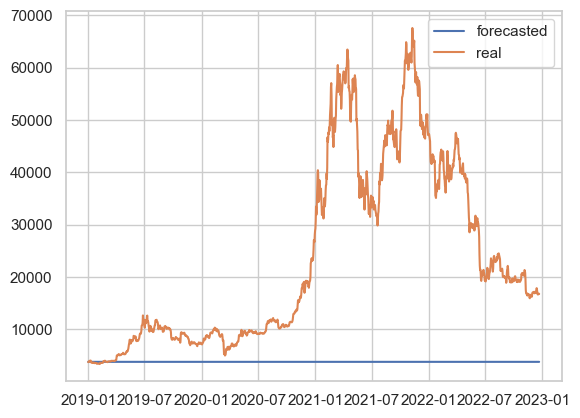

In [28]:
import matplotlib.pyplot as plt
plt.plot(forecast['date'], forecast['forecasted'],label='forecasted')
plt.plot(df_valid.index, df_valid['priceUSD'],label='real')
plt.legend()
plt.show()